In [ ]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Input
heart=pd.read_csv('/content/heart.csv')

In [ ]:
print("The shape of the dataset is : ", heart.shape)

The shape of the dataset is :  (303, 14)


In [ ]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#description about the factors
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trtbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalachh:			 maximum heart rate achieved
exng:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slp:			the slope of the peak exercise ST segment
caa:			number of major vessels (0-3) colored by flourosopy
thall:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dict = {}
for i in list(heart.columns):
    dict[i] = heart[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#this is to show that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.
print(heart.corr()["output"].abs().sort_values(ascending=False))

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


In [ ]:
heart.groupby('output').size()

output
0    138
1    165
dtype: int64

In [ ]:
heart.groupby('output').sum()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


Visualization


Count plots

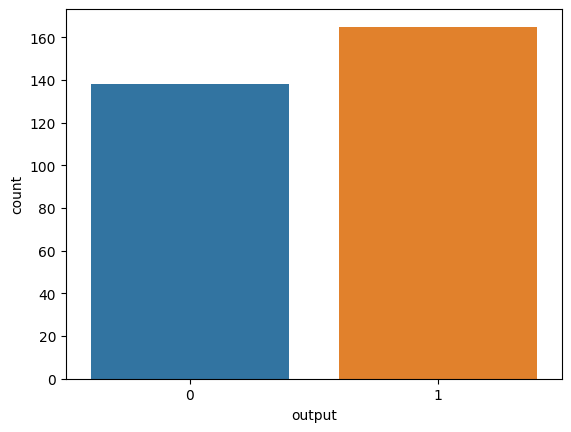

In [ ]:
sns.countplot(x=heart["output"])
plt.show()

Text(0, 0.5, '')

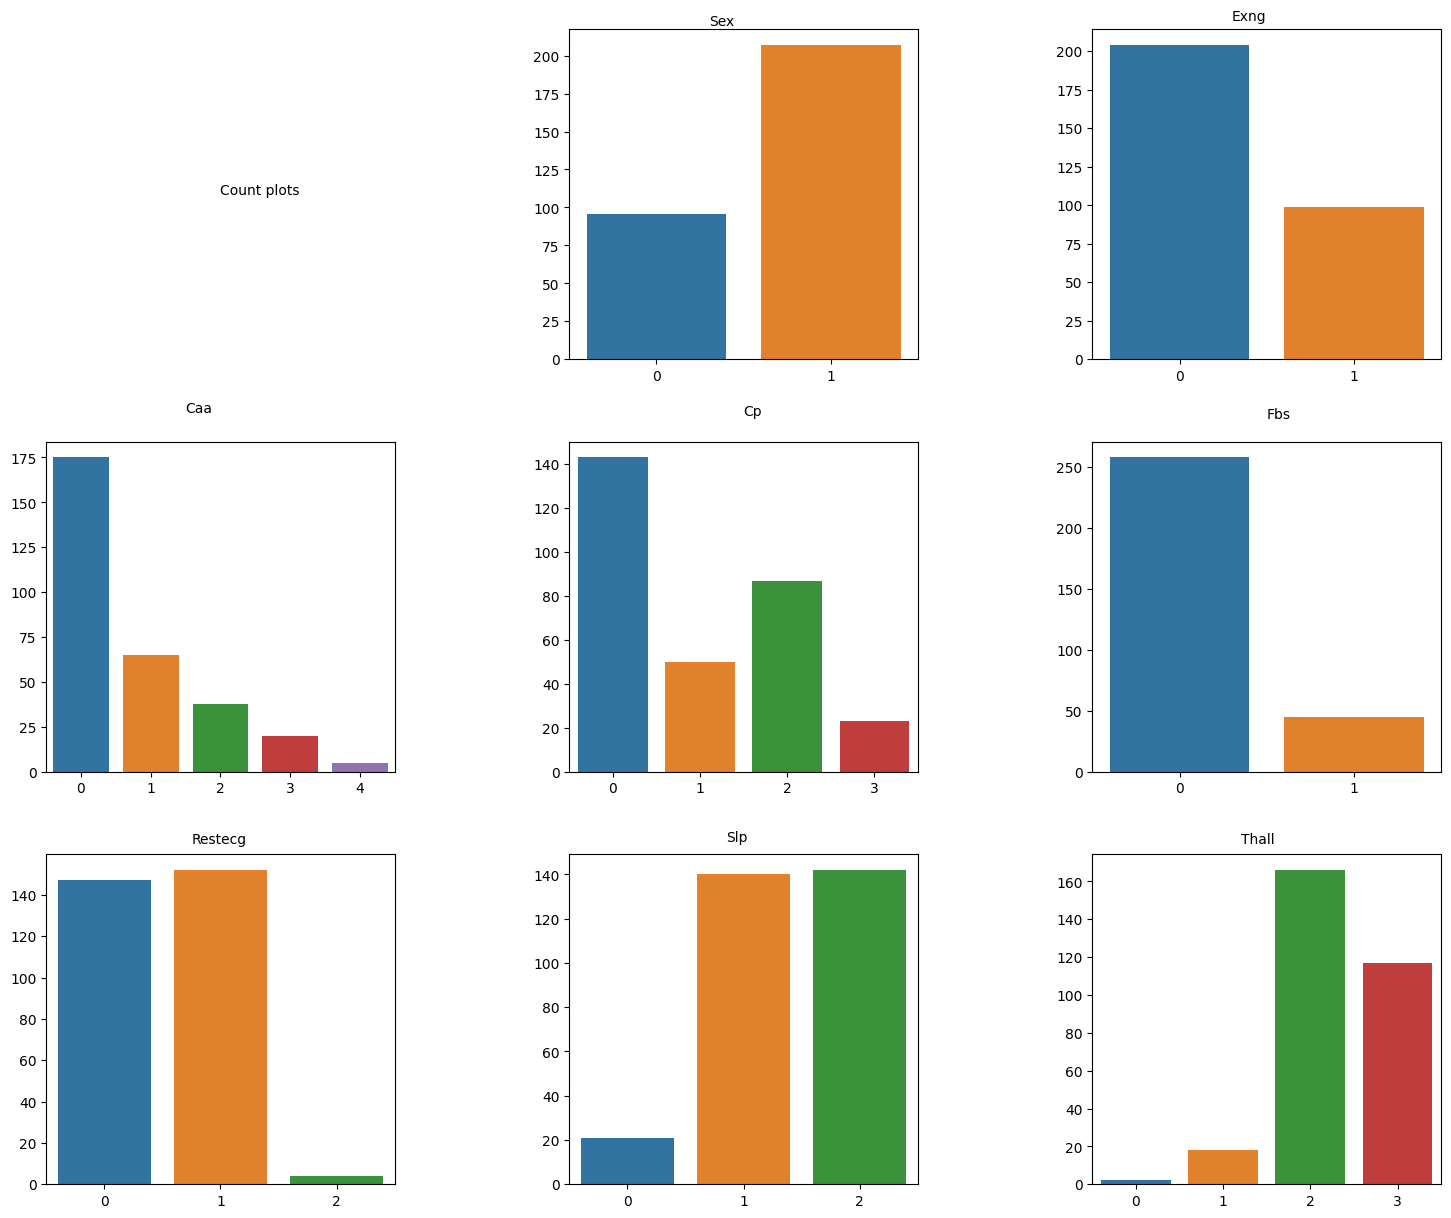

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(0.5,0.5,'Count plots')
ax1.text(0.3,220, 'Sex')
sns.countplot(ax=ax1,data=heart,x='sex')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.text(0.3, 220, 'Exng')
sns.countplot(ax=ax2,data=heart,x='exng')
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.text(1.5, 200, 'Caa')
sns.countplot(ax=ax3,data=heart,x='caa')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax4.text(1.5, 162, 'Cp')
sns.countplot(ax=ax4,data=heart,x='cp')
ax4.set_xlabel("")
ax4.set_ylabel("")
ax5.text(0.5, 290, 'Fbs')
sns.countplot(ax=ax5,data=heart,x='fbs')
ax5.set_xlabel("")
ax5.set_ylabel("")
ax6.text(0.75, 165, 'Restecg')
sns.countplot(ax=ax6,data=heart,x='restecg')
ax6.set_xlabel("")
ax6.set_ylabel("")
ax7.text(0.85, 155, 'Slp')
sns.countplot(ax=ax7,data=heart,x='slp')
ax7.set_xlabel("")
ax7.set_ylabel("")
ax8.text(1.2, 180, 'Thall')
sns.countplot(ax=ax8,data=heart,x='thall')
ax8.set_xlabel("")
ax8.set_ylabel("")


Barplots

<Axes: xlabel='cp', ylabel='output'>

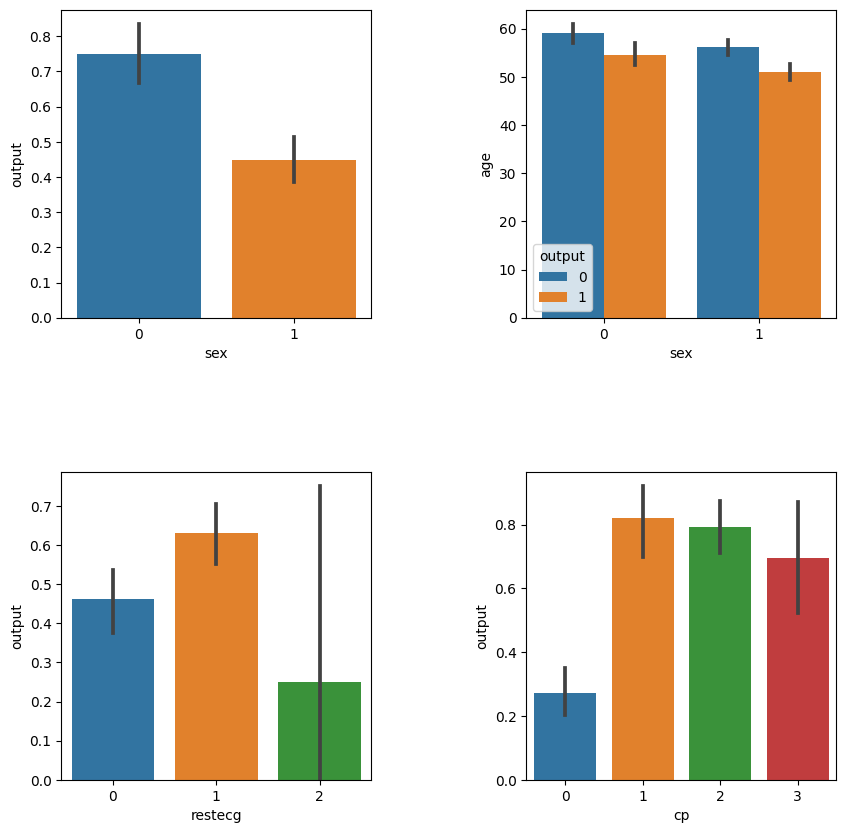

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
sns.barplot(ax=ax0,x=heart["sex"],y=heart['output'])
sns.barplot(ax=ax1,x=heart['sex'],y=heart['age'],hue=heart['output'])
sns.barplot(ax=ax2,x=heart["restecg"],y=heart['output'])
sns.barplot(ax=ax3,x=heart["cp"],y=heart['output'])

KDE plots

Text(0, 0.5, 'output')

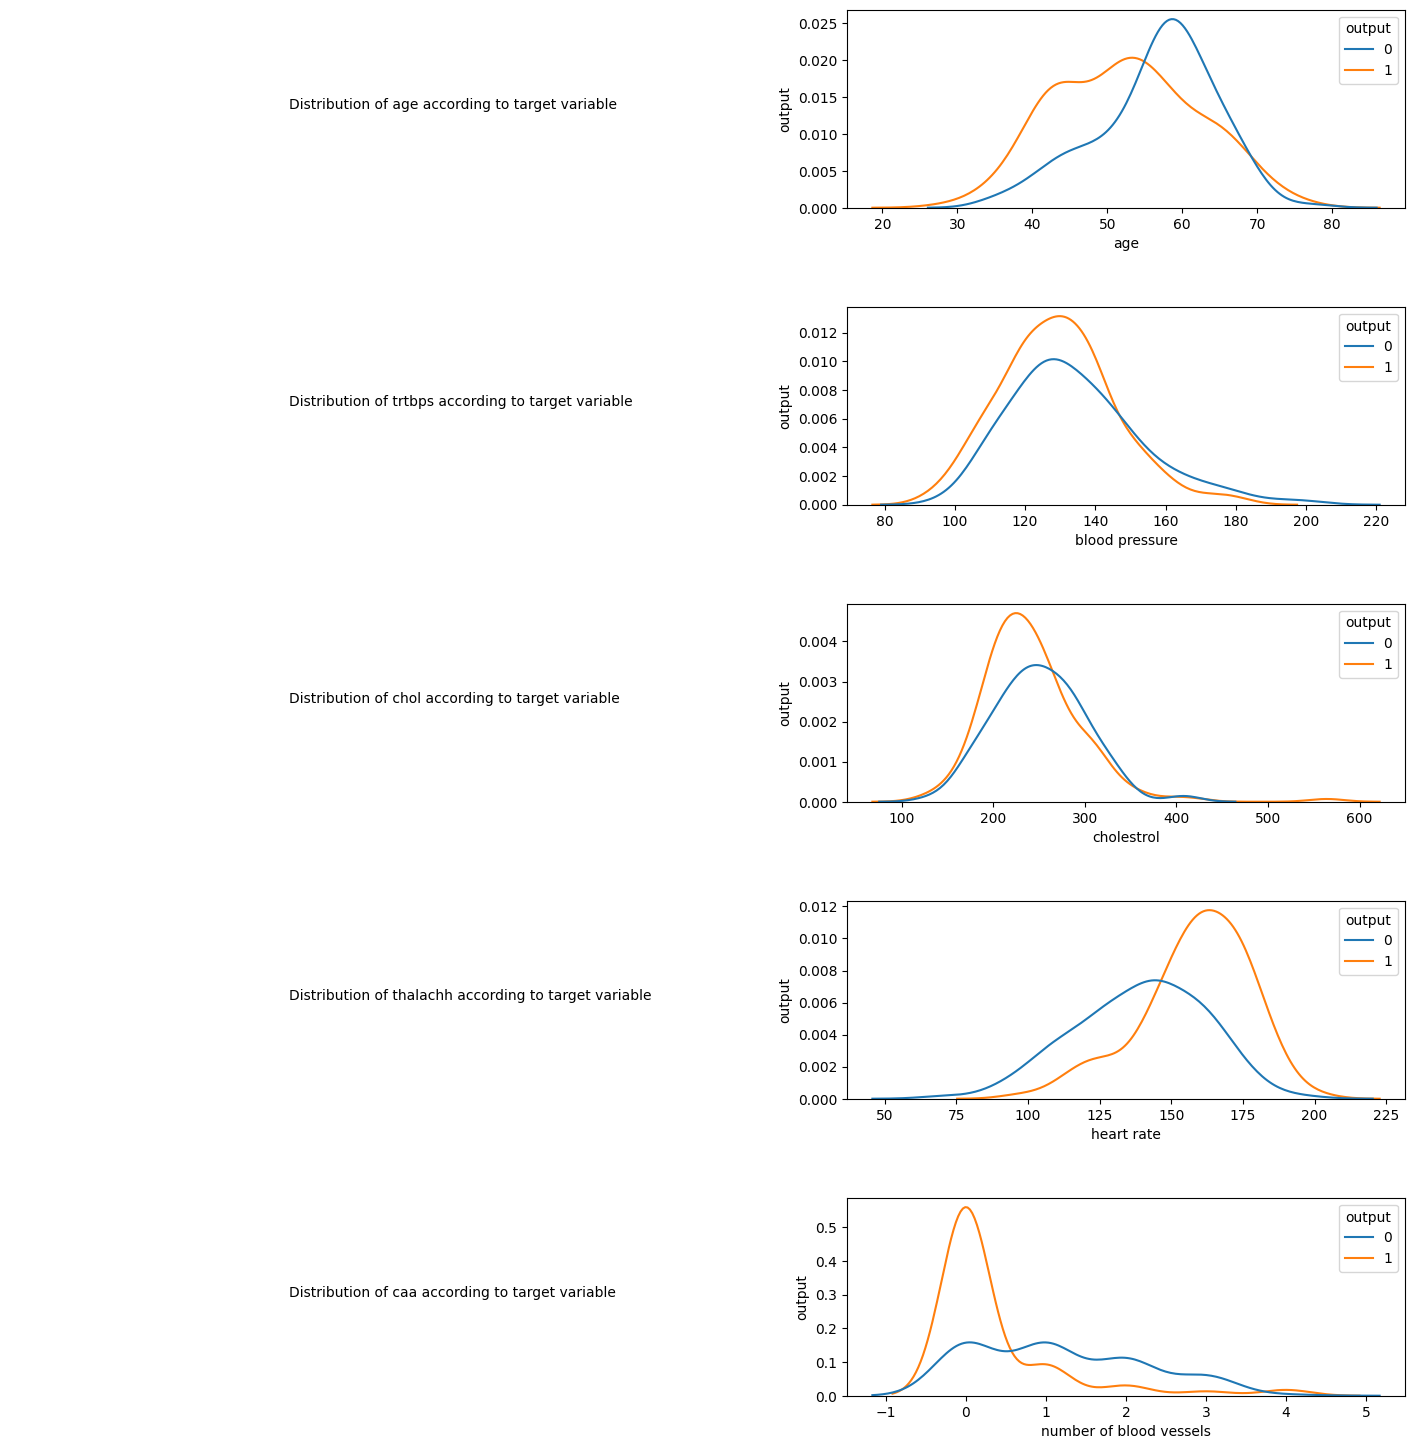

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
for i in ["top","left","right","bottom"]:
    ax0.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
# Age
ax0.text(0.5,0.5,"Distribution of age according to target variable",)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
sns.kdeplot(ax=ax1, data=heart, x='age',hue="output")
ax1.set_xlabel("age")
ax1.set_ylabel("output")
#trtbps
ax2.text(0.5,0.5,"Distribution of trtbps according to target variable",)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
sns.kdeplot(ax=ax3, data=heart, x='trtbps',hue="output")
ax3.set_xlabel("blood pressure")
ax3.set_ylabel("output")
#chol
ax4.text(0.5,0.5,"Distribution of chol according to target variable",)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
sns.kdeplot(ax=ax5, data=heart, x='chol',hue="output")
ax5.set_xlabel("cholestrol")
ax5.set_ylabel("output")
#thalachh
ax6.text(0.5,0.5,"Distribution of thalachh according to target variable",)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
sns.kdeplot(ax=ax7, data=heart, x='thalachh',hue="output")
ax7.set_xlabel("heart rate")
ax7.set_ylabel("output")
#caa
ax8.text(0.5,0.5,"Distribution of caa according to target variable",)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
sns.kdeplot(ax=ax9, data=heart, x='caa',hue="output")
ax9.set_xlabel("number of blood vessels")
ax9.set_ylabel("output")

Text(0.5, 0, 'heart rate')

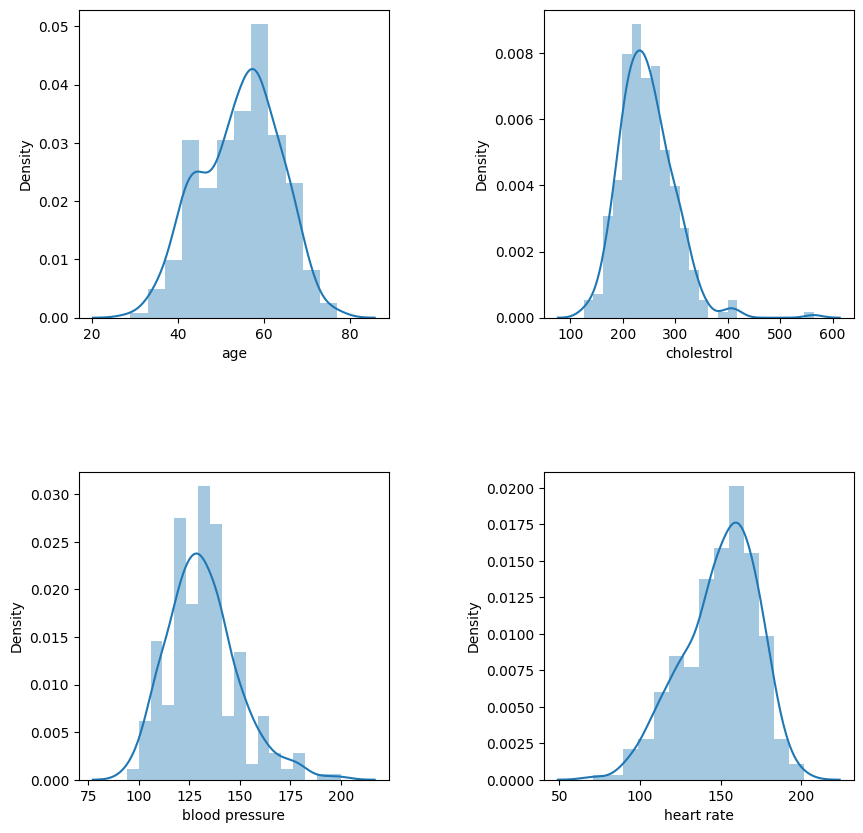

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
sns.distplot(ax=ax0,x=heart["age"])
ax0.set_xlabel("age")
sns.distplot(ax=ax1,x=heart["chol"])
ax1.set_xlabel("cholestrol")
sns.distplot(ax=ax2,x=heart["trtbps"])
ax2.set_xlabel("blood pressure")
sns.distplot(ax=ax3,x=heart["thalachh"])
ax3.set_xlabel("heart rate")

Histogram


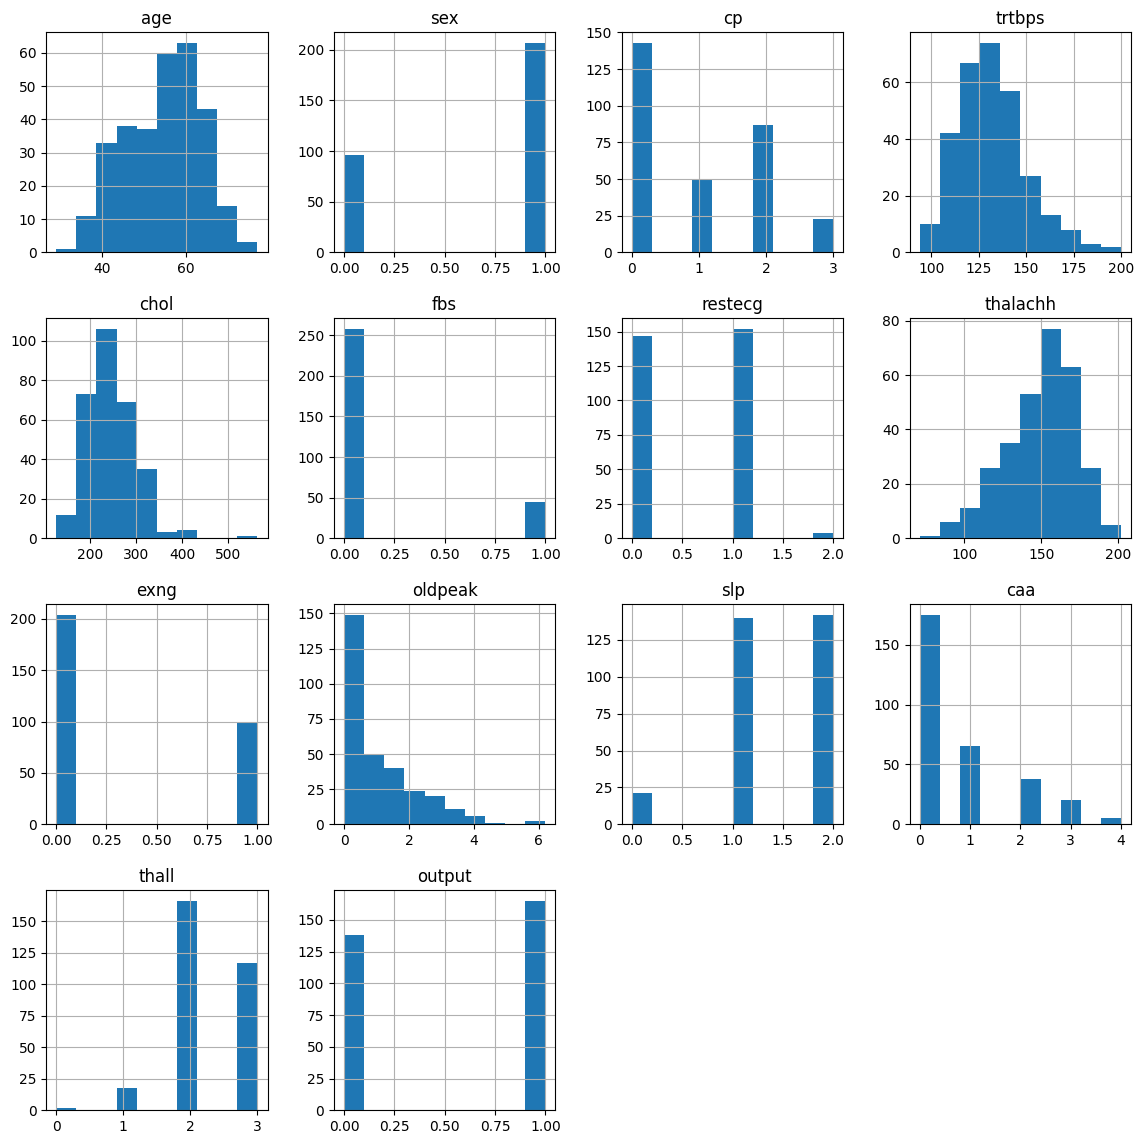

In [ ]:
heart.hist(figsize=(14,14))
plt.show()

Correlation matrix

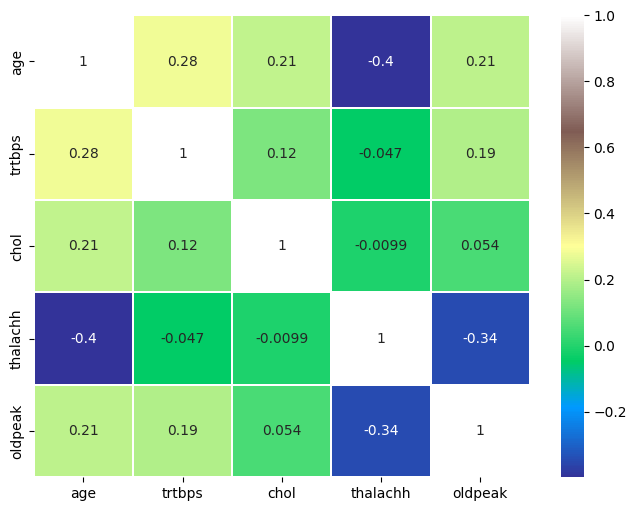

In [ ]:
sns.heatmap(heart[con_cols].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

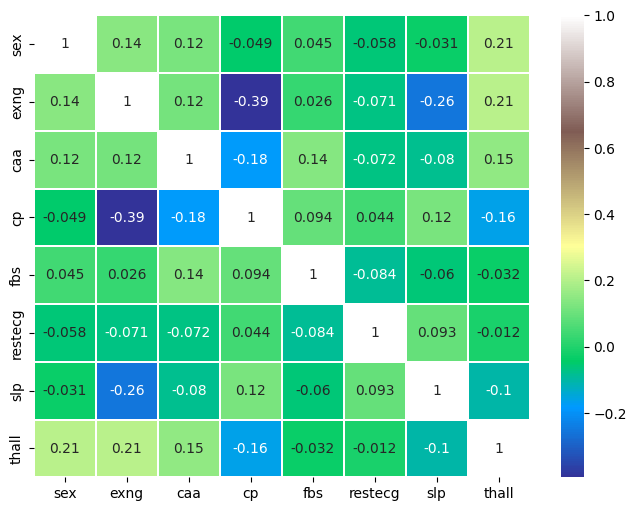

In [ ]:
sns.heatmap(heart[cat_cols].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [ ]:
#importing packages
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df1 = heart
# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
X = df1.drop(['output'],axis=1)
y = df1[['output']]
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()


The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
pd.DataFrame(X).transpose()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,0.592593,-1.333333,-1.037037,0.074074,0.148148,0.148148,0.074074,-0.814815,-0.222222,0.148148,...,0.888889,-0.814815,0.592593,0.592593,0.296296,0.148148,-0.740741,0.962963,0.148148,0.148148
trtbps,0.750000,0.000000,0.000000,-0.500000,-0.500000,0.500000,0.500000,-0.500000,2.100000,1.000000,...,1.100000,-0.500000,0.500000,-0.300000,1.700000,0.500000,-1.000000,0.700000,0.000000,0.000000
chol,-0.110236,0.157480,-0.566929,-0.062992,1.795276,-0.755906,0.850394,0.362205,-0.645669,-1.133858,...,-0.440945,-1.118110,-0.834646,-0.677165,-1.007874,0.015748,0.377953,-0.740157,-1.716535,-0.062992
thalachh,-0.092308,1.046154,0.584615,0.769231,0.307692,-0.153846,0.000000,0.615385,0.276923,0.646154,...,-0.092308,-0.276923,-0.276923,-0.523077,-1.938462,-0.923077,-0.646154,-0.369231,-1.169231,0.646154
oldpeak,0.937500,1.687500,0.375000,0.000000,-0.125000,-0.250000,0.312500,-0.500000,-0.187500,0.500000,...,0.000000,1.250000,2.000000,-0.500000,0.125000,-0.375000,0.250000,1.625000,0.250000,-0.500000
sex_1,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
exng_1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
caa_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
caa_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
caa_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("X_train  ", X_train.shape)
print("X_test   ",X_test.shape)
print("y_train  ",y_train.shape)
print("y_test   ",y_test.shape)

X_train   (242, 22)
X_test    (61, 22)
y_train   (242, 1)
y_test    (61, 1)


In [ ]:
scores={}

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
LR_z=accuracy_score(y_test, y_pred)*100
scores['Logistic Regression']=LR_z
print("The test accuracy score of Logistric Regression is ", LR_z)

The test accuracy score of Logistric Regression is  90.1639344262295


In [ ]:
X_LR=np.array([[0.592593, 0.750000, -0.110236, -0.092308, 0.937500, 1.000000, 0.000000,
                0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                0.000000, 0.000000]])
X_LR_prediction=logreg.predict(X_LR)

In [ ]:
X_LR_prediction[0]

1

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)
SVM_z=accuracy_score(y_test, y_pred)*100
scores["SVM"]=SVM_z
print("The test accuracy score of SVM is ",SVM_z )

The test accuracy score of SVM is  86.88524590163934


In [ ]:
X_SVM=np.array([[0.592593, 0.750000, -0.110236, -0.092308, 0.937500, 1.000000, 0.000000,
                0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                0.000000, 0.000000]])
X_SVM_prediction=logreg.predict(X_SVM)

In [ ]:
X_SVM_prediction[0]

1

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
DT_z=accuracy_score(y_test, y_pred)*100
scores["Decision tree"]=DT_z
print("The test accuracy score of Decision Tree is ",DT_z )

The test accuracy score of Decision Tree is  78.68852459016394


In [ ]:
X_DT=np.array([[0.592593, 0.750000, -0.110236, -0.092308, 0.937500, 1.000000, 0.000000,
                0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                0.000000, 0.000000]])
X_DT_prediction=logreg.predict(X_DT)

In [ ]:
X_DT_prediction[0]

1

In [ ]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)
GB_z=accuracy_score(y_test, y_pred)*100
scores["Gradient Booster"]=GB_z
print("The test accuracy score of Gradient Boosting Classifier is ",GB_z)

The test accuracy score of Gradient Boosting Classifier is  86.88524590163934


In [ ]:
X_GB=np.array([[0.592593, 0.750000, -0.110236, -0.092308, 0.937500, 1.000000, 0.000000,
                0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000,
                0.000000, 0.000000]])
X_GB_prediction=logreg.predict(X_GB)

In [ ]:
X_GB_prediction[0]

1

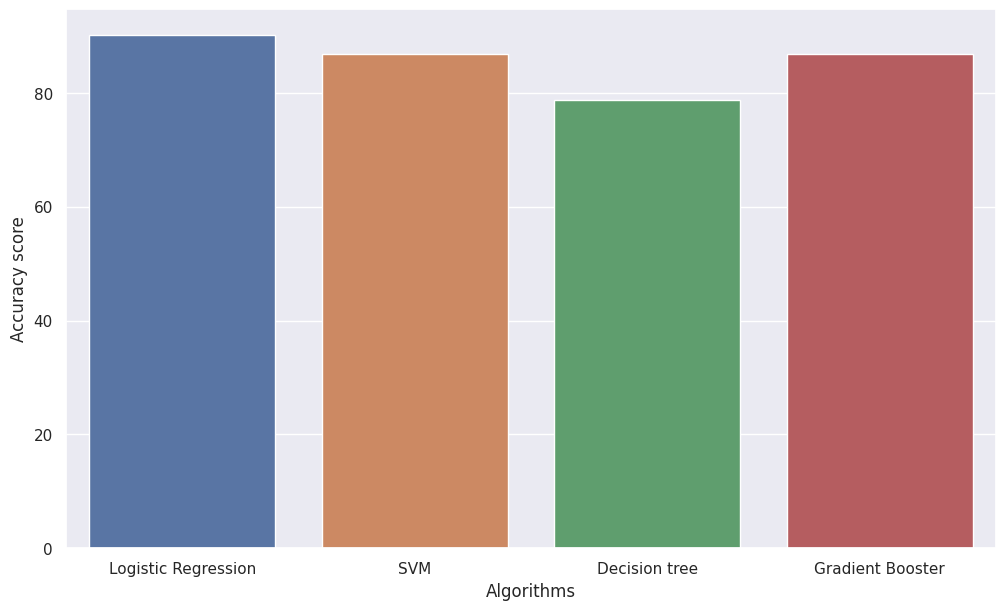

In [ ]:
algo_name = list(scores.keys())
scoress = list(scores.values())
sns.set(rc={'figure.figsize':(12,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algo_name,y=scoress)
plt.show()